In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('C:/Users/shu_n/Desktop/Kepler CS/Data/russ.csv', sep=';', index_col=['Date']) #parse_dates=['Date']
df.head()

,AAPL,AMZN,BA,BAC,BRK-B,CSCO,CVX,FB,GOOG,HD,...,PFE,PG,T,UNH,V,VZ,WFC,WMT,XOM,RUI
Date,,,,,,,,,,,,,,,,,,,,,
14/01/2015,109.800003,293.269989,130.380005,16.040001,147.820007,27.92,103.900002,76.279999,499.498627,102.639999,...,32.480000,89.989998,33.330002,103.330002,63.889999,46.970001,51.250000,86.610001,89.739998,1118.859985
15/01/2015,106.820000,286.950012,130.139999,15.200000,147.580002,27.41,102.669998,74.050003,500.416107,101.010002,...,32.400002,89.860001,33.259998,104.459999,63.282501,47.099998,50.720001,87.379997,88.959999,1108.319946
16/01/2015,105.989998,290.739990,130.779999,15.380000,149.210007,27.68,105.120003,75.180000,506.688873,104.120003,...,32.799999,91.250000,33.799999,105.769997,63.737499,47.990002,51.639999,86.769997,91.120003,1123.109985
20/01/2015,108.720001,289.440002,131.220001,15.260000,148.630005,28.07,106.470001,76.239998,505.512115,103.250000,...,33.099998,91.190002,33.950001,105.620003,64.209999,48.180000,52.000000,86.690002,91.089996,1124.479980
21/01/2015,109.550003,297.250000,132.410004,15.410000,147.179993,27.84,108.160004,76.739998,516.621643,103.529999,...,32.639999,90.730003,34.000000,109.320000,64.320000,48.250000,52.099998,86.639999,91.870003,1130.000000


In [3]:
returns = np.diff(df.values, axis=0)/df.values[:-1,:]

In [4]:
ret = pd.DataFrame(returns, index = df.index[1:], columns = df.columns)
ret.head()

,AAPL,AMZN,BA,BAC,BRK-B,CSCO,CVX,FB,GOOG,HD,...,PFE,PG,T,UNH,V,VZ,WFC,WMT,XOM,RUI
Date,,,,,,,,,,,,,,,,,,,,,
15/01/2015,-0.027140,-0.021550,-0.001841,-0.052369,-0.001624,-0.018266,-0.011838,-0.029234,0.001837,-0.015881,...,-0.002463,-0.001445,-0.002100,0.010936,-0.009508,0.002768,-0.010341,0.008890,-0.008692,-0.009420
16/01/2015,-0.007770,0.013208,0.004918,0.011842,0.011045,0.009850,0.023863,0.015260,0.012535,0.030789,...,0.012346,0.015468,0.016236,0.012541,0.007190,0.018896,0.018139,-0.006981,0.024281,0.013345
20/01/2015,0.025757,-0.004471,0.003364,-0.007802,-0.003887,0.014090,0.012842,0.014099,-0.002322,-0.008356,...,0.009146,-0.000658,0.004438,-0.001418,0.007413,0.003959,0.006971,-0.000922,-0.000329,0.001220
21/01/2015,0.007634,0.026983,0.009069,0.009830,-0.009756,-0.008194,0.015873,0.006558,0.021977,0.002712,...,-0.013897,-0.005044,0.001473,0.035031,0.001713,0.001453,0.001923,-0.000577,0.008563,0.004909
22/01/2015,0.026016,0.043970,0.024394,0.044127,0.020179,0.023707,0.007027,0.011858,0.031561,0.024534,...,0.005208,0.009809,-0.006176,0.041438,0.001244,-0.009326,0.032054,0.019160,0.010885,0.015513


CAPM:

In [20]:
y = ret['FB'].values
X = ret['RUI'].values

lr = LinearRegression(fit_intercept=False)

lr.fit(X.reshape(-1, 1),y)

print('Beta of FB: %f' % np.asscalar(lr.coef_))

Beta of FB: 1.189175


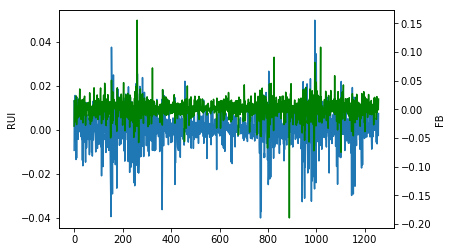

In [21]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('RUI')
ax1.plot(ret['RUI'].values)
ax2 = ax1.twinx()
ax2.set_ylabel('FB')
ax2.plot(ret['FB'].values,'g')
plt.show()

Markowitz Mean-Variance Portfolio Optimization:

In [7]:
marketCap = pd.read_csv('C:/Users/shu_n/Desktop/Kepler CS/Data/MarketCap.csv', sep=';', index_col = ['Code'])
marketCap = marketCap.reindex(df.columns[:-1])
weights = marketCap['Weight'].values
weights = weights.reshape(25,1)

In [8]:
# Covar Matrix
sigma = np.cov(ret.drop(['RUI'],axis=1).values,rowvar=False)

In [9]:
# Using latest returns rather than avg
last_ret = ret.iloc[1256].values[:-1]
last_ret = last_ret.reshape(25,1)

In [10]:
# Target return
level = 0.005

In [11]:
from scipy.optimize import minimize


def pf_var(w):
    return np.asscalar(0.5 * w.T.dot(sigma).dot(w))

def pf_var_der(w):
    return sigma.dot(w)

def algo_solver(level,ret):
    cons = ({'type': 'eq',
             'fun' : lambda w: np.sum(w) - 1},
            {'type': 'eq',
             'fun' : lambda w: np.asscalar(w.T.dot(ret)) - level})

    #bounds = ((0.0, 1.0),) * len(weights)

    res = minimize(pf_var, weights, method='SLSQP', jac=pf_var_der, constraints=cons, options={'disp':True},tol=1e-12)
    return res

In [12]:
# Analytical Solution:
from numpy.linalg import inv

def solve(target, mu):
    sigma_inv = inv(sigma)
    a = np.asscalar(np.ones((1,25)).dot(sigma_inv).dot(np.ones((25,1))))
    b = np.asscalar(np.ones((1,25)).dot(sigma_inv).dot(mu))
    c = np.asscalar(mu.T.dot(sigma_inv).dot(mu))
    delta = a*c - b*b
    l1 = (c - b*target)/delta
    l2 = (a*target - b)/delta
    res = sigma_inv.dot(l1*np.ones((25,1)) + l2*mu)
    return res

In [13]:
x = solve(level, last_ret)
pf_var(x)

2.661995115756168e-05

In [15]:
level = np.arange(0.001,0.050,0.001)

In [17]:
vols = [np.sqrt(pf_var(solve(target,last_ret))) for target in level]
vols2 = [np.sqrt(pf_var(algo_solver(target,last_ret).x)) for target in level]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.5922158381465044e-05
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.6029607474344734e-05
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.618238326402179e-05
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.638049886869551e-05
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.6623966486084295e-05
            Iterations: 36
 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.55567488413923e-05
            Iterations: 43
            Function evaluations: 44
            Gradient evaluations: 43
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.747616673977722e-05
            Iterations: 43
            Function evaluations: 44
            Gradient evaluations: 43
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.944087419998694e-05
            Iterations: 43
            Function evaluations: 44
            Gradient evaluations: 43
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.145087121094302e-05
            Iterations: 43
            Function evaluations: 44
            Gradient evaluations: 43
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.350615772955813e-05
            Iterations: 43
     

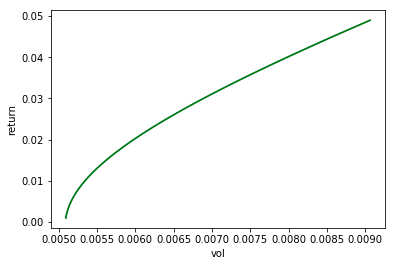

In [19]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('vol')
ax1.set_ylabel('return')
ax1.plot(vols,level)
ax1.plot(vols2,level,'-g')
plt.show()

In [48]:
# Using avg of last 30 returns
last30_ret = np.mean((ret.iloc[1225:1256].values[:,:-1]), axis=0)
last30_ret = last30_ret.reshape(25,1)

One period model:

In [49]:
res = algo_solver(0.01, last30_ret)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0001229014148384613
            Iterations: 43
            Function evaluations: 43
            Gradient evaluations: 43


In [50]:
compo = res.x
compo = compo.reshape(25,1)
compo.T

array([[ 0.56697581, -0.10040535, -0.68884924,  0.21559663,  0.33479464,
        -0.07609578, -0.20522772,  0.0807074 ,  0.13587288,  0.09383594,
        -0.21752104,  0.56651532,  0.22764786,  0.13239134,  0.09210359,
        -0.05729692, -0.08778565,  0.23725541,  0.34410761,  0.10440664,
         0.13133691, -0.18299601, -0.59675613, -0.14519188,  0.09457774]])

In [52]:
print('Replication pf return: %f' % last_ret.T.dot(compo))

Replication pf return: 0.019922


In [53]:
print('Index return: %f' % ret.iloc[1256].values[25])

Index return: 0.007294


Porfolio performs better than index over one period.